In [1]:
import cv2
from build_model import download_dataset, build_labeled_images, resize, train_test_split, build_generators, build_model, print_test_data_evaluation
import matplotlib.pyplot as plt
import random
from constants import LABEL_TO_INDEX

/Users/vadimklimenko/Projects/set/dl-final/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = download_dataset()
labeled_images = build_labeled_images(path)
data, labels = resize(labeled_images)

Path to dataset files: /Users/vadimklimenko/.cache/kagglehub/datasets/anshtanwar/pets-facial-expression-dataset/versions/11
Found images:
happy: 250
sad: 250
angry: 250

Found faces: 48, Not found faces: 702


In [3]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
train_generator, val_generator = build_generators(X_train, X_val, y_train, y_val, data, labels)

resnet_model = build_model(train_generator, val_generator)
print(resnet_model)
model, history = resnet_model

Epoch 1/20


/Users/vadimklimenko/Projects/set/dl-final/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2785 - loss: 2.5451 - val_accuracy: 0.3533 - val_loss: 4.0223 - learning_rate: 1.5000e-04
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.4198 - loss: 1.8856 - val_accuracy: 0.4333 - val_loss: 3.7927 - learning_rate: 1.5000e-04
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5407 - loss: 1.2833 - val_accuracy: 0.4600 - val_loss: 3.9393 - learning_rate: 1.5000e-04
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6329 - loss: 0.9402 - val_accuracy: 0.4800 - val_loss: 4.4755 - learning_rate: 1.5000e-04
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7142 - loss: 0.7713 - val_accuracy: 0.5933 - val_loss: 2.6380 - learning_rate: 1.5000e-04
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7357 - loss: 0.6709 - val_accuracy: 0.6067 - val_loss: 1.8153 - learning_rate: 1.5000e-04
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7935 - loss: 0.5749 - v

In [4]:
print_test_data_evaluation(model, X_train, y_train, X_val, y_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.9459 - loss: 0.1776
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.9952 - loss: 0.0175
Test data evaluation: loss=0.1535, accuracy=0.9600
Train data evaluation: loss=0.0205, accuracy=0.9933


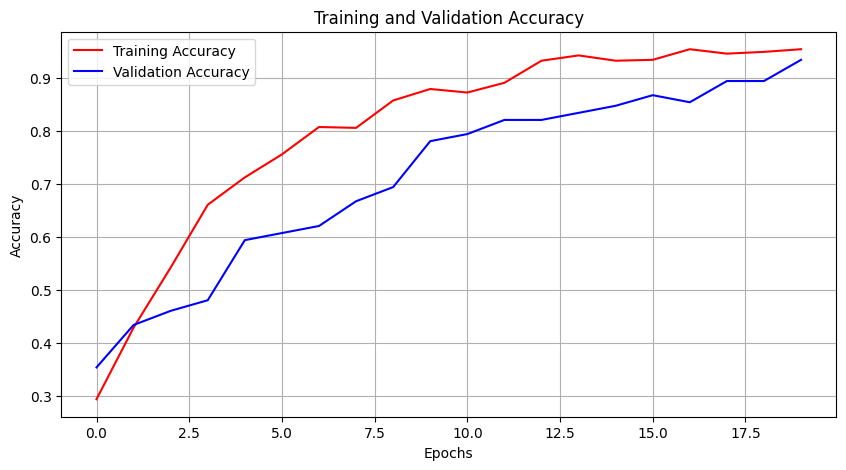

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
model.save(f'./model.keras')